<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 
- However, there are some additional questions along the way that don't fit neatly into the one main example we'll walk through. Any question that isn't explicitly part of the main example is marked with **(detour)** at the start of the question.

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

** Answer: **

    1.  How much more (or less) likely is someone to be left handed given their answers to a list of questions regarding their personality?

    2.  Do people who are left handed agree with certain personality questions more, less, or about the same relative to right handed people?
    
    3.  Do people who are left handed agree with violent personality propositions more, less, or about the same relative to right handed people.

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('./data.csv', sep='\t')

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

** Answer: **

    1.  Allow respondents to answer the questions on a computer/in a manner that doesn't involve handwritten responses (to protect their identity).
    
    2.  Allow respondents to answer in a private room/delay when the answers are received so they feel more confident in their identities being protected.
    
    3.  Allow the respondents to participate anonymously.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [4]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [5]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [6]:
df.isnull().sum().head()

Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
dtype: int64

In [7]:
df.shape

(4184, 56)

In [8]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [9]:
# df.info()

In [10]:
df['country'].unique()

array(['US', 'CA', 'NL', 'GR', 'GB', 'KR', 'SE', 'NO', 'DE', 'NZ', 'CH',
       'RO', 'IL', 'IN', 'ZA', 'TR', 'JM', 'AU', 'BE', 'PL', 'CZ', 'RS',
       'TW', 'A2', 'MX', 'PH', 'ES', 'AT', 'JP', 'IT', 'SG', 'MY', 'HK',
       'FR', 'EU', 'DK', 'AE', 'EC', 'TH', 'IE', 'PK', 'BR', 'ID', 'EG',
       'NI', 'FI', 'CN', 'RU', 'SI', 'AR', 'PT', 'LB', 'DO', 'PF', 'LT',
       'BG', 'GE', 'CL', 'SK', 'EE', 'KE', 'UZ', 'LV', 'BB', 'BN', 'PR',
       'HR', 'NP', 'A1', 'PE', 'UA', 'HU', 'VN', 'TZ', 'KH', 'UY', 'VE',
       'IS', 'MP', 'CO', 'JO', 'TN', 'KW', 'CY', 'FJ', 'LK', 'VI', 'ZW',
       'IM', 'ZM', 'QA', 'DZ', 'LY', 'SA'], dtype=object)

In [11]:
df['engnat'].head()

0    1
1    1
2    2
3    1
4    1
Name: engnat, dtype: int64

### Changing 'no' from 2 to 0 in the engnat and fromgoogle columns, as this is what I am accustomed to.

In [12]:
df['engnat'].replace(2, 0, inplace=True)

In [13]:
df['fromgoogle'].replace(2, 0, inplace=True)

---

In [14]:
col_list = list(df.columns)

In [15]:
answer_vals = [list(df[col].unique()) for col in col_list]

In [16]:
answer_vals[0]

[4, 1, 5, 3, 2, 0]

In [17]:
new_dict = dict(zip(col_list, answer_vals))

In [18]:
# new_dict

#### I notice that some people answered 0 for education, 0 for gender, 0 for orientation, 0 for race, and 0 for hand, which do not equate to anything in the survey.  I will first take a look at how many 0's there are for each of these columns and then decide how to deal with them.

#### I also notice some impossible/improbable responses to the age question.  I will have to investigate this as well.

#### Third, I notice that some respondent's testelapse (time between test start and test submission) is very low - I will set a threshold of time for low testelapse values and remove responses less than the threshold (under the assumption that the responses are not truly valid).

In [19]:
df['education'].value_counts()

2    2055
3    1086
1     546
4     446
0      51
Name: education, dtype: int64

In [20]:
df['gender'].value_counts()

2    2212
1    1586
3     304
0      82
Name: gender, dtype: int64

In [21]:
df['orientation'].value_counts()

1    2307
2     833
5     349
3     335
4     237
0     123
Name: orientation, dtype: int64

In [22]:
df['race'].value_counts()

6    2793
1     393
2     383
7     342
3     168
0      66
4      33
5       6
Name: race, dtype: int64

In [23]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [24]:
# set(df['age'].unique())

In [25]:
df[(df['age'] == 123)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2075,3,4,5,4,3,4,5,4,3,3,...,US,0,1,123,1,1,5,7,7,3


In [26]:
df[(df['age'] == 409)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2137,1,2,5,4,3,1,5,1,5,3,...,US,0,1,409,2,1,5,6,1,1


In [27]:
df[(df['age'] == 23763)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2690,2,5,5,1,5,5,5,5,4,2,...,US,0,0,23763,4,1,2,7,7,0


In [28]:
find_avg_list = list(df['age'])

In [29]:
find_avg_list.remove(123)

In [30]:
find_avg_list.remove(409)

In [31]:
find_avg_list.remove(23763)

In [32]:
np.mean(find_avg_list)

24.5816790241569

In [33]:
df['age'][2075] = np.mean(find_avg_list)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df['age'][2137] = np.mean(find_avg_list)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df['age'][2690] = np.mean(find_avg_list)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
"""for col in col_list:
    if col != 'age':
        plt.figure()
        plt.ylabel('age')
        plt.xlabel(col)
        plt.scatter(df[col], df['age'])
    else:
        pass"""

"for col in col_list:\n    if col != 'age':\n        plt.figure()\n        plt.ylabel('age')\n        plt.xlabel(col)\n        plt.scatter(df[col], df['age'])\n    else:\n        pass"

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

** Answer: **

This would be a classification problem because we are trying to determine someone's class (left or right-handed).  The dependent variable, whether or not someone is left-handed, is categorical and unordered.

### (detour) 6. While this isn't the problem we set out to solve, suppose I wanted to predict the exact age of the respondent using Q1 - Q44 as my predictors. Would this be a classification or regression problem? Why?

** Answer: **

This would be a regression problem because the dependent variable, someone's age, is continuous and ordered.

### 7. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

** Answer: **

We would standardize our variables to be certain that they are being weighed on a similar scale.  This is to ensure a certain feature, or variable, does not have undue influence on a model solely based on the matter in which it is measured.

One example of when we would standardize our variables is if we were trying to determine someone's income based on his/her age and High School GPA;  someone's age can range between 14 to 100, for example, while his/her High School GPA can only range between 0.0 and 4.0, two very differently scaled variables.

### 8. Give an example of when we might not standardize our variables.

** Answer: **

An example of when we might not standardize our variables are when they are all being weighed on the same scale.

### 9. Based on your answers to 7 and 8, do you think we should standardize our predictor variables in this case? Why or why not?

** Answer: **

Based on my answers to questions 7 and 8, I do not think we should standardize our predictor variables in this case because they are all being weighed on a scale of 1 to 5, with the numbers representing the same things for each variable.

### 10. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

** Answer: **

There are 11 '0' responses to the questions asking whether someone is right-handed, left-handed, or both.  I will delete these rows as there is a total of more than 4000 responses and 11 is a very small percentage.

In [37]:
df['hand'].isnull().sum()

0

In [38]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [39]:
df = df[df.hand != 0]

In [40]:
df['hand'].value_counts()

1    3542
2     452
3     179
Name: hand, dtype: int64

In [41]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,0,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,0,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,0,0,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,0,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,0,1,22,3,1,1,3,2,3


### 11. The professor for whom you work suggests that you set $k = 4$. Why might this be a bad idea in this specific case?

** Answer: **

Setting k = 4 could a bad idea in this specific case because the data set contains more than 4000 responses, and k = 4 could be too few.  If k is set too small, there is a risk of overfitting the model.

### 12. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
target = df['hand']

In [45]:
features = col_list[0:44]

In [46]:
X = df[features]
y = df['hand']

In [47]:
y.value_counts(normalize=True)

1    0.848790
2    0.108315
3    0.042895
Name: hand, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# k = 3

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
knn.score(X_train, y_train)

0.8660914030041547

In [52]:
knn.score(X_test, y_test)

0.8199233716475096

In [53]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8175156132402824

# k = 5

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
knn.score(X_train, y_train)

0.8536273569830617

In [57]:
knn.score(X_test, y_test)

0.8477011494252874

In [58]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8357326149345085

# k = 15

In [59]:
knn = KNeighborsClassifier(n_neighbors=15)

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [61]:
knn.score(X_train, y_train)

0.8488334931287952

In [62]:
knn.score(X_test, y_test)

0.8486590038314177

In [63]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8488337070026014

# k = 25

In [64]:
knn = KNeighborsClassifier(n_neighbors=25)

In [65]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [66]:
knn.score(X_train, y_train)

0.8488334931287952

In [67]:
knn.score(X_test, y_test)

0.8486590038314177

In [68]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8488337070026014

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

** Answer: **

Yes, there is default regularization - it is Ridge regression regularization.

### 14. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features? Well, the answer is (as always), **it depends**. What is one reason you would standardize? What is one reason you would not standardize?

** Answer: **
- An example of when I would standardize in logistic regression is if the variables/features were measured on different scales.
- An example of when I would not standardize in logistic regression is if the variables/features were measured on the same scale.

### 15. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

# Lasso and alpha = 1

In [69]:
logreg = LogisticRegression(penalty = 'l1', C = 1)

In [70]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
logreg.score(X_train, y_train)

0.8488334931287952

In [72]:
logreg.score(X_test, y_test)

0.8486590038314177

In [73]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8488337070026014

# Lasso and alpha = 10

In [74]:
logreg = LogisticRegression(penalty = 'l1', C = (1/10))

In [75]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
logreg.score(X_train, y_train)

0.8488334931287952

In [77]:
logreg.score(X_test, y_test)

0.8486590038314177

In [78]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.848513809369844

# Ridge and alpha = 1

In [79]:
logreg = LogisticRegression(penalty = 'l2', C = 1)

In [80]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
logreg.score(X_train, y_train)

0.8488334931287952

In [82]:
logreg.score(X_test, y_test)

0.8486590038314177

In [83]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8488337070026014

# Ridge and alpha = 10

In [84]:
logreg = LogisticRegression(penalty = 'l2', C = (1/10))

In [85]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
logreg.score(X_train, y_train)

0.8488334931287952

In [87]:
logreg.score(X_test, y_test)

0.8486590038314177

In [88]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8488337070026014

---
## Step 5: Evaluate the model(s).

### 16. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not?

** Answer: **

I personally do not believe personality traits would be linked to someone being right or left-handed, but that is my purely speculative opinion, it is not based on any science or factual evidence, therefore, I could easily be wrong.

I do not think my X variables will do a good job prediction my Y varibales.

### 17. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)

Answer:

# One

In [89]:
knn = KNeighborsClassifier(n_neighbors=3)

In [90]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [91]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8175156132402824

In [92]:
cross_val_score(knn, X_test, y_test, cv = 3).mean()

0.8199278800165136

---

# Two

In [93]:
knn = KNeighborsClassifier(n_neighbors=5)

In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8357326149345085

In [96]:
cross_val_score(knn, X_test, y_test, cv = 3).mean()

0.8390850630521506

---

# Three

In [97]:
knn = KNeighborsClassifier(n_neighbors=15)

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [99]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8488337070026014

In [100]:
cross_val_score(knn, X_test, y_test, cv = 3).mean()

0.8486609258203087

---

# Four

In [101]:
knn = KNeighborsClassifier(n_neighbors=25)

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [103]:
cross_val_score(knn, X_train, y_train, cv = 3).mean()

0.8488337070026014

In [104]:
cross_val_score(knn, X_test, y_test, cv = 3).mean()

0.8486609258203087

---

# Five

In [105]:
logreg = LogisticRegression(penalty = 'l1', C = 1)

In [106]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8488337070026014

In [108]:
cross_val_score(logreg, X_test, y_test, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8438716221519802

---

# Six

In [109]:
logreg = LogisticRegression(penalty = 'l1', C = (1/10))

In [110]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.848513809369844

In [112]:
cross_val_score(logreg, X_test, y_test, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8486609258203087

---

# Seven

In [113]:
logreg = LogisticRegression(penalty = 'l2', C = 1)

In [114]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8488337070026014

In [116]:
cross_val_score(logreg, X_test, y_test, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8400401728897818

---

# Eight

In [117]:
logreg = LogisticRegression(penalty = 'l2', C = (1/10))

In [118]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8488337070026014

In [120]:
cross_val_score(logreg, X_test, y_test, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8457928517389158

---

### 18. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer:

My knn models that have n_neighbors set to 15 and 25 show evidence of overfitting; the cross_val_score is slightly greater on the training set vs. the test set.

### 19. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer:

As k increases, bias goes up, and variance goes down.

### 20. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

    1. Remove features.
    2. Regularize.
    3. Reduce k.

### 21. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer:

The Lasso with alpha = 1, and both Ridge logistic regressions showed evidence of overfitting - all three models had cross_val_test scores higher on their training set than their testing set.

### 22. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer:

C is the inverse of alpha.  As alpha increases, bias increases and variance decreases.  Therefore, as C increases, bias decreases and variance increases.

### 23. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What might this mean in the context of this problem?

Answer:

As I increase C, the model becomes less overfit and the cross_val_score on the train drops relative to the cross_val_score on the test.

### 24. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

** Answer: **

    1. Remove features.
    2. Regularize.
    3. Reduce C.

---
## Step 6: Answer the problem.

### 25. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

** Answer: **

If I wanted to understand which psychological features are most important in determining left-handedness, I would rather use a logistic regression because it will learn a linear classifier.

### 26. Select a logistic regression model. Interpret the coefficient for `Q1`.

In [121]:
logreg = LogisticRegression(penalty = 'l1', C = (1/10))

In [122]:
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
cross_val_score(logreg, X_train, y_train, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.848513809369844

In [124]:
cross_val_score(logreg, X_test, y_test, cv = 3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8486609258203087

In [125]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

In [126]:
coefficients.head()

,0,0,1,2
0,Q1,0.000000,-0.016159,0.000000
1,Q2,0.008002,-0.013940,0.000000
2,Q3,-0.053204,0.000000,0.109276
3,Q4,0.000000,-0.060275,0.128700
4,Q5,-0.037662,0.066492,0.000000


In [127]:
np.exp(-0.016152)

0.9839777440706995

In [128]:
100 * ((np.exp(-0.016152)) - 1)

-1.602225592930051

---

## For every unit increase in Q1 (every unit the respondent is more likely to have studied how to win at gambling), the respondent is 1.60% more likely than before to be right-handed.

---

### 27. If you have to select one model overall to be your *best* model, which model would you select? Why?

** Answer: **

If I had to select one model overall to be my *** best *** model, I would select the Lasso Logistic Regression model, because as of yet, it has seemed to perform the best.

### 28. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer these for the professor based on the model you selected!

Answer:

In [129]:
first_44 = df[col_list[0:44]]

In [130]:
first_44['hand'] = df['hand']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


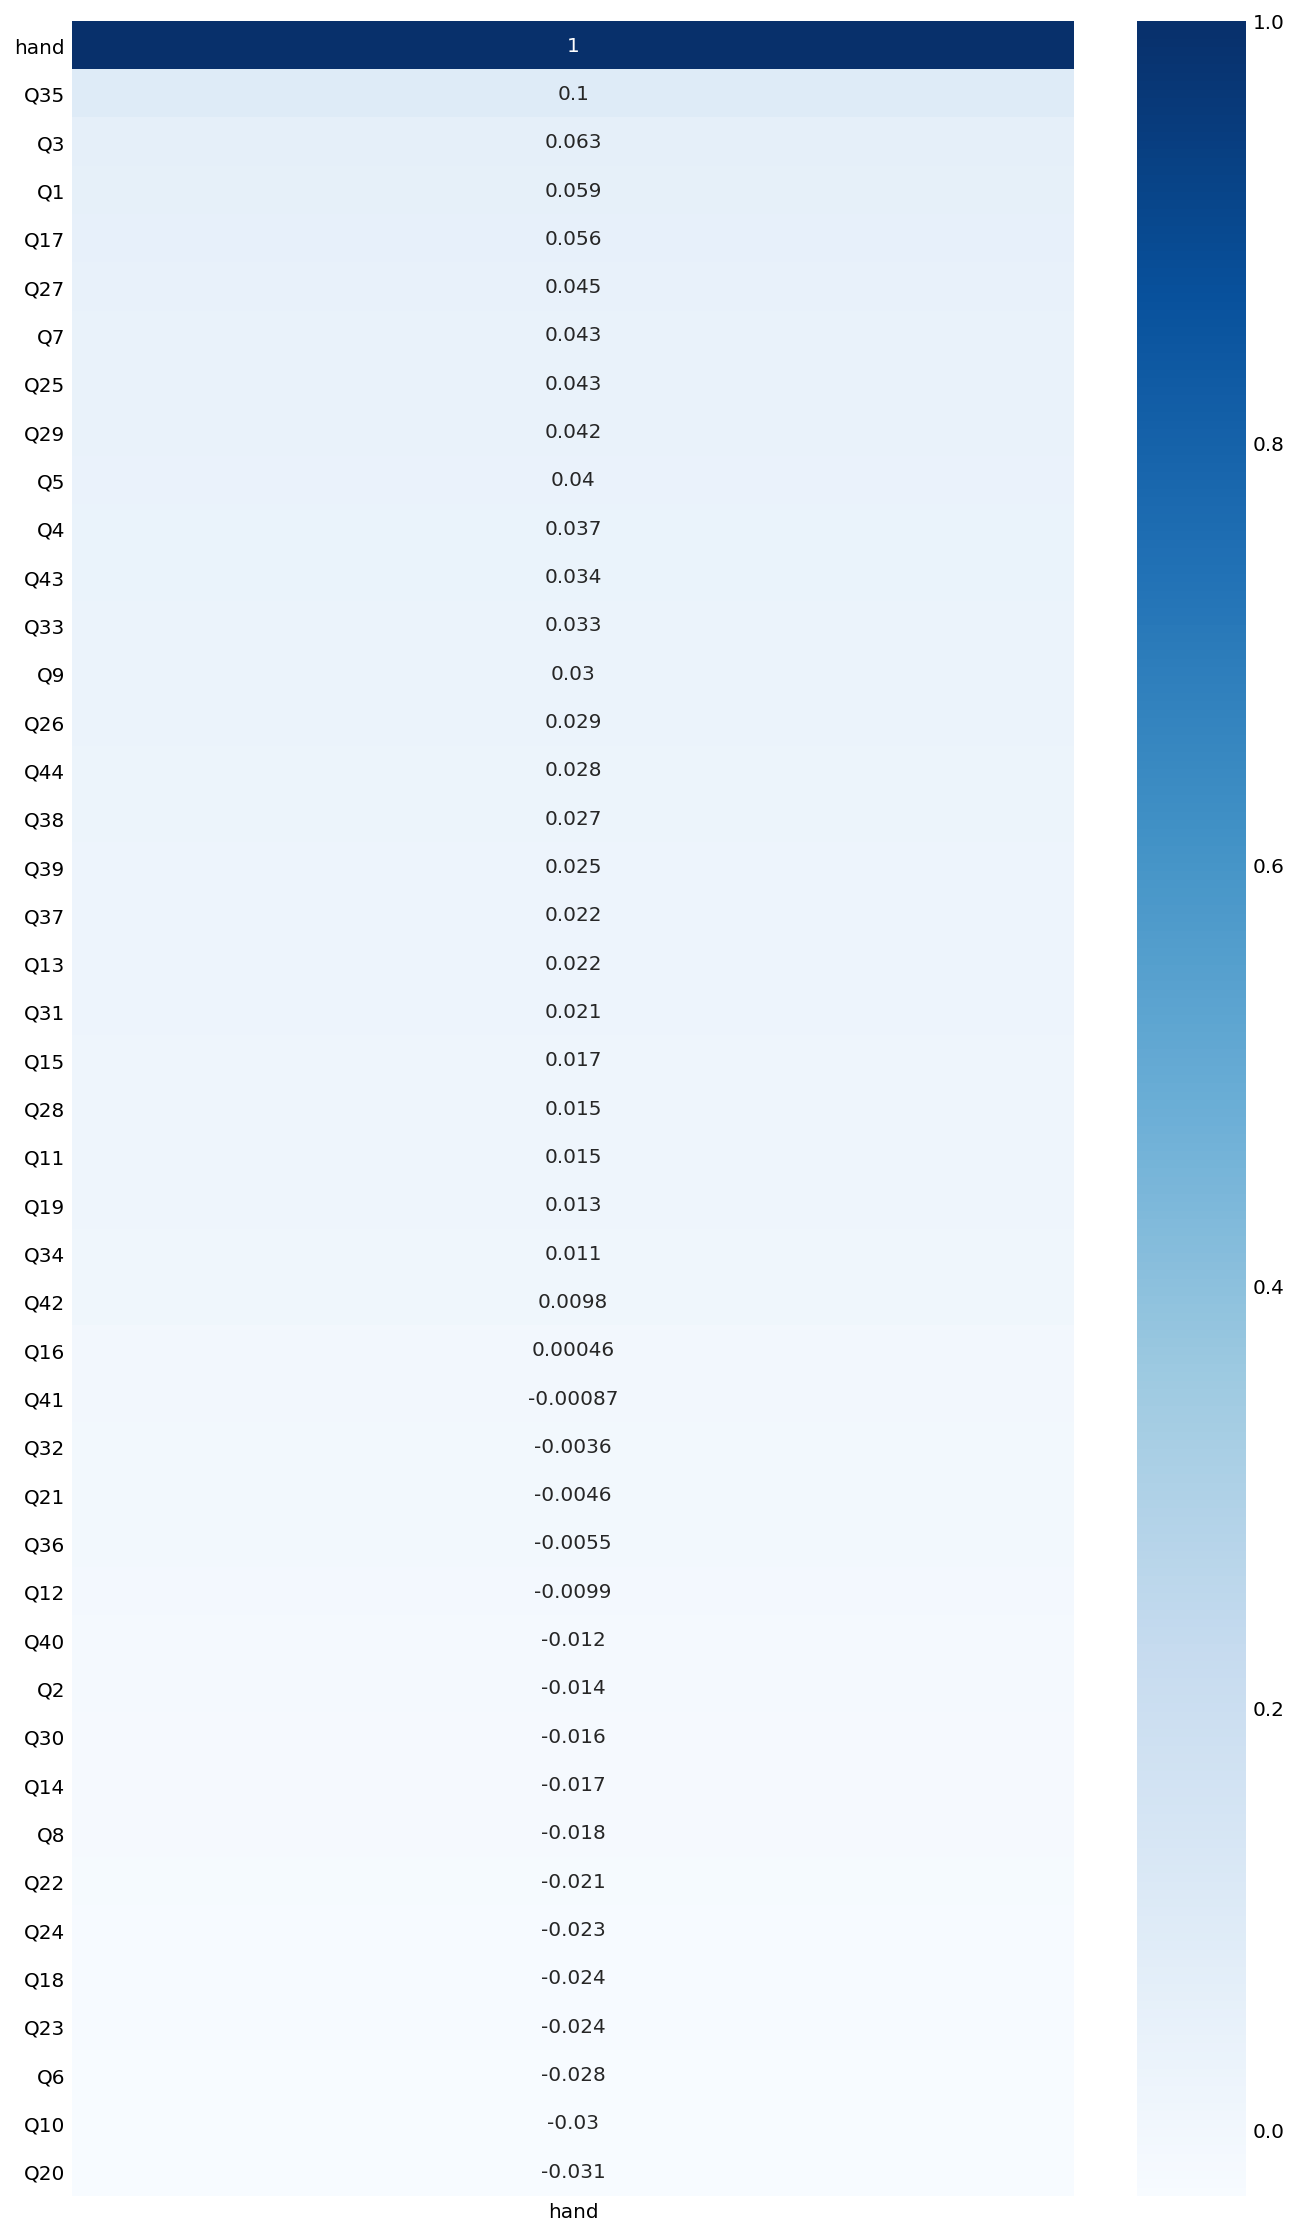

In [131]:
plt.figure(figsize=(10, 20))

sns.heatmap(first_44.corr()[['hand']].sort_values('hand', ascending=False), annot=True, cmap='Blues');

** Questions from above: **

    1.  How much more (or less) likely is someone to be left handed given their answers to a list of questions regarding their personality?

    2.  Do people who are left handed agree with certain personality questions more, less, or about the same relative to right handed people?
    
    3.  Do people who are left handed agree with violent personality propositions more, less, or about the same relative to right handed people.

### As can be seen above, there are not any questions that correlate strongly to the 'hand' column.  Therefore, I am unable to make any conclusions based on the given data.  I am unsure how to proceed to further investigate the above questions.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following:
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)
- Fit and evaluate one or more of the generalized linear models discussed above.
- Create a plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?